# Set up
Import the proper modules to work

In [165]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# Check the Data
Inspect the data and see what information is relevant 

In [166]:
data = pd.read_csv("all_data.csv")
print(data.head(10))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11


In [167]:
print(data.info())
print("_____")
print(data.dtypes)
print("_____")
print(data.Country.unique())
print("_____")
print(data.Year.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
_____
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
_____
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
_____
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [168]:
#after looking a the data, the colume "Life expectancy at birth (years)" is way too long, so lets change that

data = data.rename(columns = {"Life expectancy at birth (years)" : "Expectancy"})
print(data.head(2))



  Country  Year  Expectancy           GDP
0   Chile  2000        77.3  7.786093e+10
1   Chile  2001        77.3  7.097992e+10


# Scope out
Think about what we want to look at.
Some ideas:
1. Life Expectancy year over year 
2. GDP year over year
4. Average Life Expectancy per country
5. What does distribution look like for life expectancy.
6. Average GDP per country
7. Is Life Expectancy and GDP correlated?

## Life Expectancy Year over Year
So now that we've seen some of the above data, lets just do some work. Lets take a look at the life expectancy year over year


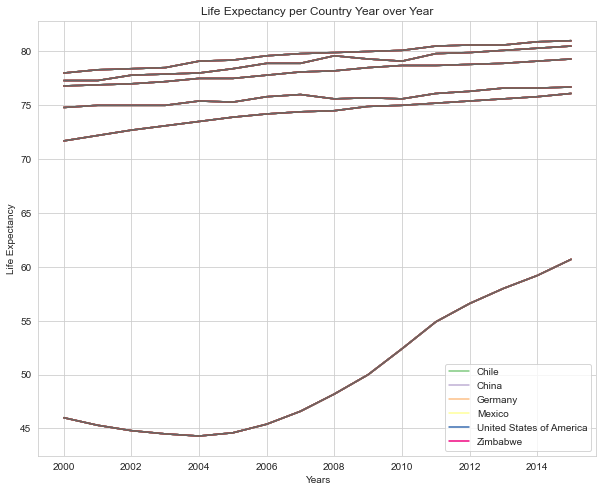

<Figure size 432x288 with 0 Axes>

In [169]:
#Lets look at one chart using matplotlib

plt.figure(figsize=(10,8))
ax = plt.subplot()
labels = data.Country.unique()

for country in data.Country:
    plt.plot(data[data.Country == country].Year, data[data.Country == country].Expectancy)

plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy per Country Year over Year")
plt.legend(labels)
plt.show()
plt.clf()


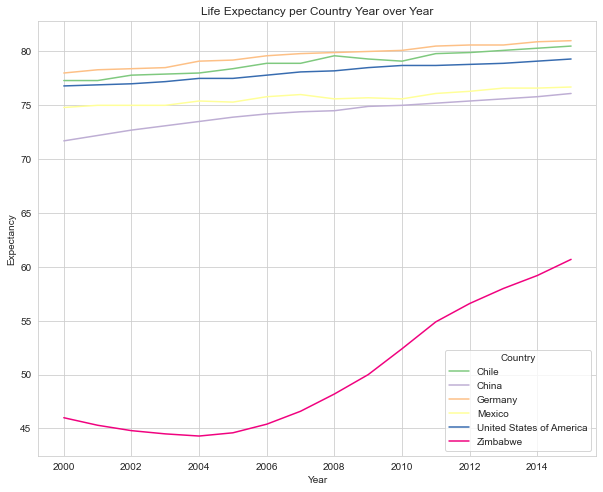

<Figure size 432x288 with 0 Axes>

In [170]:
#same graph using seaborn for ease

plt.figure(figsize = (10,8))

sns.lineplot(
data= data,
x = "Year",
y = "Expectancy",
hue = "Country")

sns.set_style("darkgrid")
sns.set_palette("twilight")
plt.title("Life Expectancy per Country Year over Year")
plt.show()
plt.clf()


## GDP Year over Year
Lets take a look at the GDP year over year (same way...one graph with matplotlib, the other with seaborn

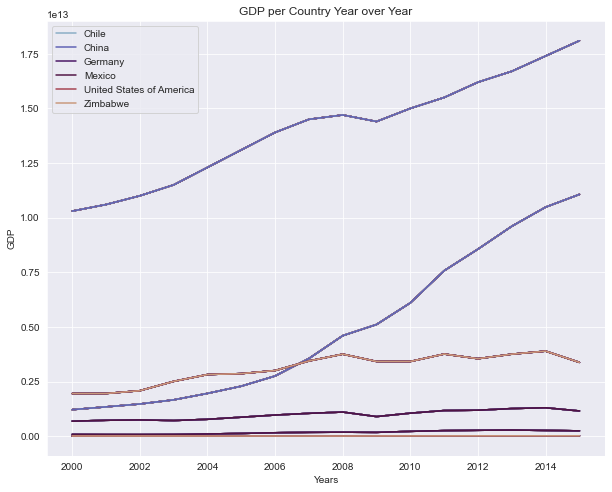

<Figure size 432x288 with 0 Axes>

In [171]:
#matplotlib

plt.figure(figsize=(10,8))
ax = plt.subplot()
labels = data.Country.unique()

for country in data.Country:
    plt.plot(data[data.Country == country].Year, data[data.Country == country].GDP)

plt.xlabel("Years")
plt.ylabel("GDP")
plt.title("GDP per Country Year over Year")
plt.legend(labels)
plt.show()
plt.clf()

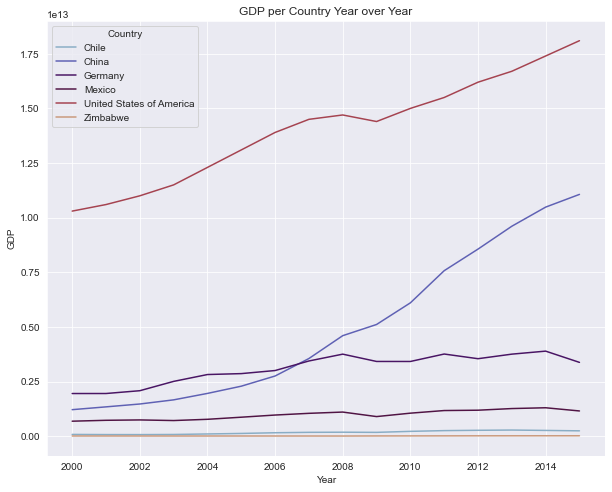

<Figure size 432x288 with 0 Axes>

In [172]:
#same graph using seaborn for ease

plt.figure(figsize = (10,8))

sns.lineplot(
data= data,
x = "Year",
y = "GDP",
hue = "Country")

sns.set_style("ticks")
sns.set_palette("ocean")
plt.title("GDP per Country Year over Year")
plt.show()
plt.clf()

## Average Life Expectancy per Country and analysis
We've seen can work with pyplot or with seaborn. Lets just work with whatever is easiest to create and analyze the data

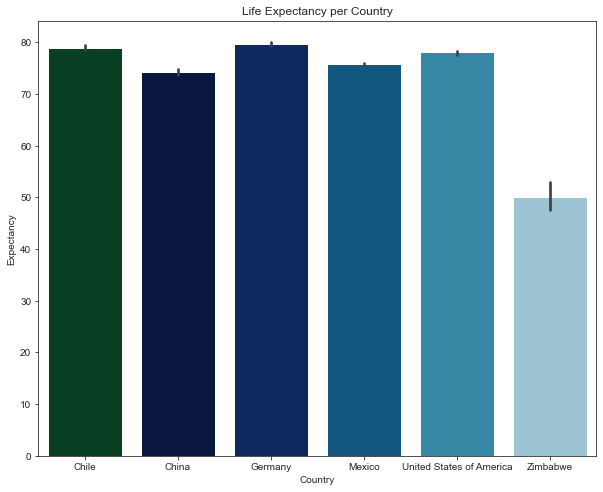

<Figure size 432x288 with 0 Axes>

In [173]:
#average expectancy per country

plt.figure(figsize = (10,8))
sns.barplot(
data = data,
x = 'Country',
y = 'Expectancy'
)

sns.set_style("whitegrid")
sns.set_palette("Accent")
plt.title("Life Expectancy per Country")
plt.show()
plt.clf()


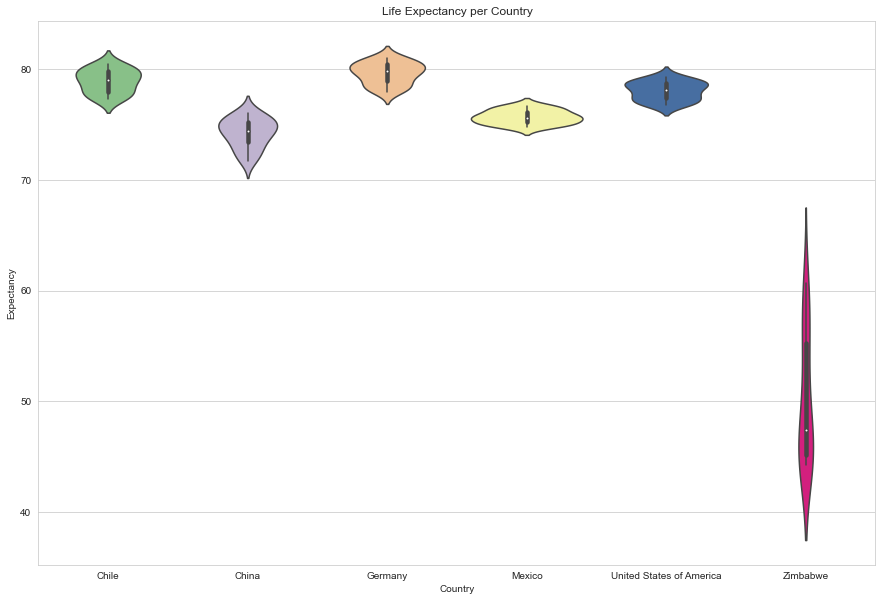

<Figure size 432x288 with 0 Axes>

In [174]:
#how about the distribution of Life Expectancy per Country?

plt.figure(figsize = (15,10))
sns.violinplot(
data = data,
x = 'Country',
y = 'Expectancy'
)
plt.title("Life Expectancy per Country")
plt.show()
plt.clf()

### Notes
Interesting to see the distribution here. The average life expectancy for the countries (minus Zimbabwe) seem to be fairly similar, but the distributions from the chart above show that China has a left-skewed distribution while the US and Chile are bi-modal around the mean. Zimbabwe, though the mean seems to be 50, the median is much lower and there is a wide range of data points with a big range of life expectancy. Whats happening in Zimbabwe?

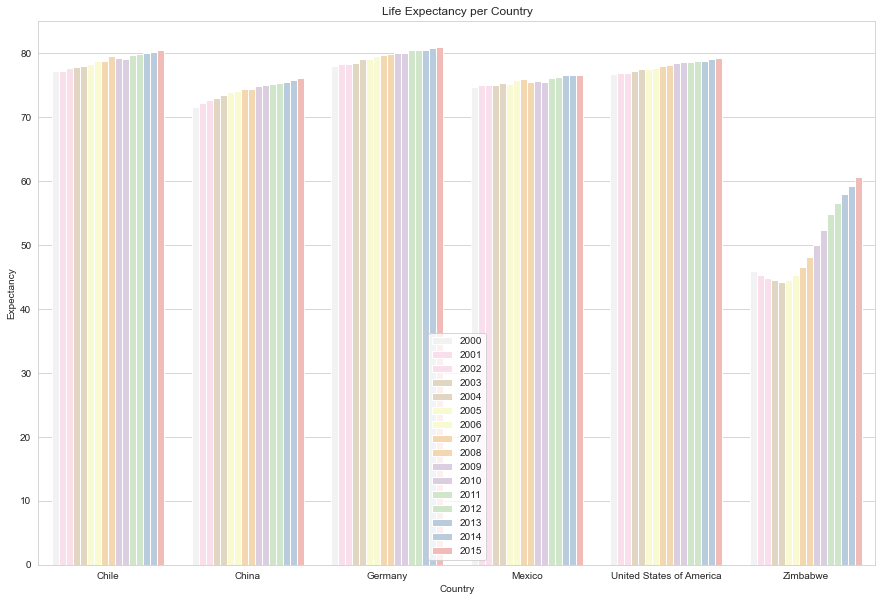

<Figure size 432x288 with 0 Axes>

In [175]:
#how about life expectancy per country year over year?

plt.figure(figsize = (15,10))
sns.barplot(
data = data,
x = 'Country',
y = 'Expectancy',
hue = "Year",
palette = "Pastel1_r"
)
plt.title("Life Expectancy per Country")
plt.legend(loc = 'lower center')
plt.show()
plt.clf()

## Notes
So we can see in Zimbabwe, after 2005, theres been a major uptick in life expectancy. The distribution picture makes sense now.

## Average GDP per Country and analysis

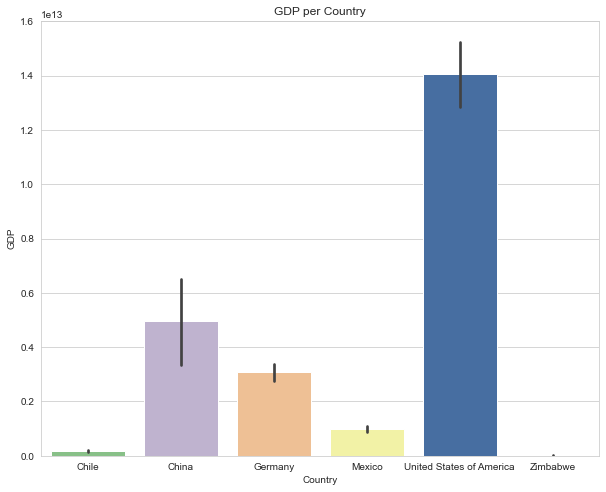

<Figure size 432x288 with 0 Axes>

In [176]:
#average GDP per country

plt.figure(figsize = (10,8))
sns.barplot(
data = data,
x = 'Country',
y = 'GDP'
)

sns.set_style("whitegrid")
sns.set_palette("Accent")
plt.title("GDP per Country")
plt.show()
plt.clf()


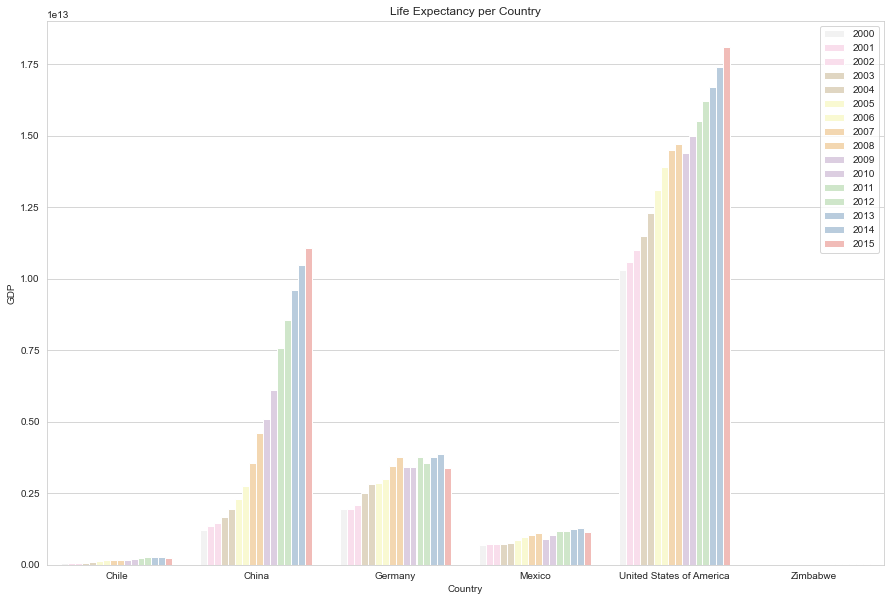

<Figure size 432x288 with 0 Axes>

In [177]:
#how about the distribution of GDP per Country?


plt.figure(figsize = (15,10))
sns.barplot(
data = data,
x = 'Country',
y = 'GDP',
hue = "Year",
palette = "Pastel1_r"
)
plt.title("Life Expectancy per Country")
plt.legend(loc = 'upper right')
plt.show()
plt.clf()

### Notes

Can see that Chile, Mexico, and Germany have had consistent steady GDP growth, while China and the US have exponentially increased their GDP year over year.

## Correlation between Life Expectancy and GDP?


In [199]:
#Lets try to scatter plot to see if theres any relation

<Figure size 1080x720 with 0 Axes>

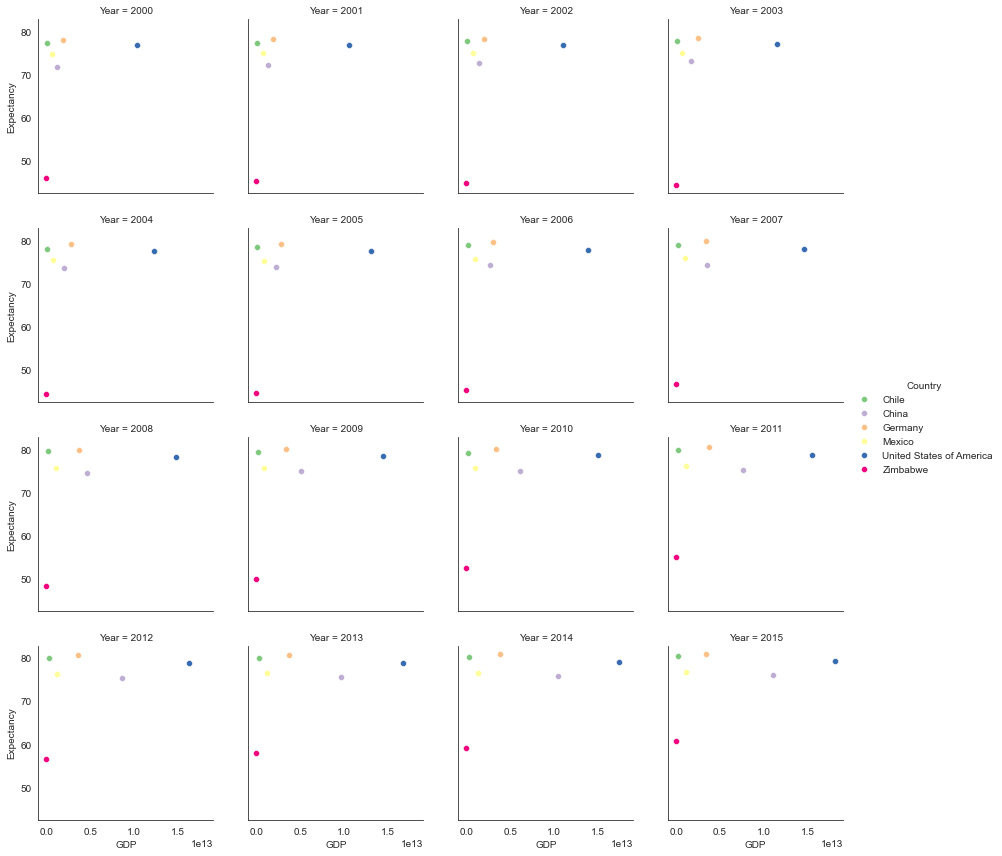

<Figure size 432x288 with 0 Axes>

In [200]:
plt.figure(figsize = (15, 10))
sns.set_style("white")

g = sns.FacetGrid(data, col = "Year", hue = "Country", col_wrap = 4)
g.map(sns.scatterplot, "GDP", "Expectancy")
g.add_legend()
g.fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

plt.show()
plt.clf()





<Figure size 1080x720 with 0 Axes>

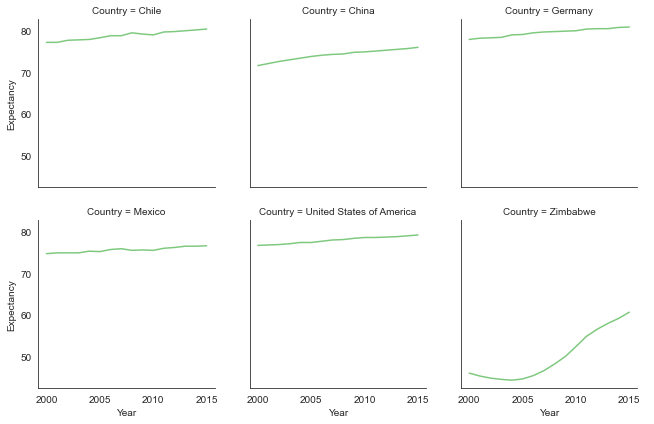

<Figure size 432x288 with 0 Axes>

In [207]:
#hard to see any relation. lets see some seperate line graphs of GDP and Life Expectancy

plt.figure(figsize = (15, 10))
sns.set_style("white")

g = sns.FacetGrid(data, col = "Country", col_wrap = 3)
g.map(sns.lineplot, "Year", "Expectancy")
g.add_legend()
g.fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

plt.show()
plt.clf()


<Figure size 1080x720 with 0 Axes>

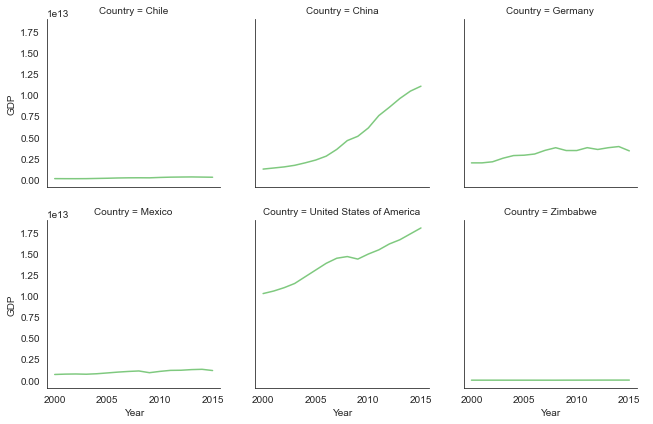

<Figure size 432x288 with 0 Axes>

In [208]:
plt.figure(figsize = (15, 10))
sns.set_style("white")

g = sns.FacetGrid(data, col = "Country", col_wrap = 3)
g.map(sns.lineplot, "Year", "GDP")
g.add_legend()
g.fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

plt.show()
plt.clf()


### Notes

So we can see that as GDP increased exponentially in the US and China, life expectancy got higher as well. 